# Classification

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

In [47]:
churn = pd.read_csv('data/churn.csv')

In [48]:
churn.shape

(400, 3)

In [4]:
churn.head()

,has_churned,time_since_first_purchase,time_since_last_purchase
0,0,-1.089221,-0.721322
1,0,1.182983,3.634435
2,0,-0.846156,-0.427582
3,0,0.086942,-0.535672
4,0,-1.166642,-0.672640


In [6]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   has_churned                400 non-null    int64  
 1   time_since_first_purchase  400 non-null    float64
 2   time_since_last_purchase   400 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 9.5 KB


In [7]:
churn.describe()

,has_churned,time_since_first_purchase,time_since_last_purchase
count,400.000000,400.000000,400.000000
mean,0.500000,-0.034370,0.144549
std,0.500626,0.952936,1.103133
min,0.000000,-1.273770,-0.870666
25%,0.000000,-0.828377,-0.645824
50%,0.500000,-0.152072,-0.265036
75%,1.000000,0.544826,0.571214
max,1.000000,3.738312,5.928242


# EDA exploratory data analysis

/Users/alekseishokhirev/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


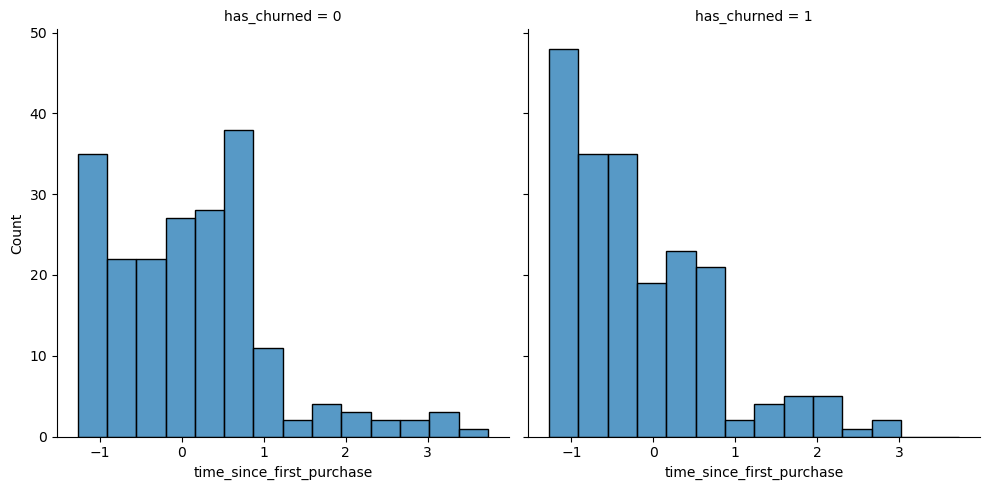

In [8]:
# plot distribution of variables
sns.displot(data=churn, 
            x='time_since_first_purchase', 
            col='has_churned')
plt.show()

Customers with shorter length of relationship tend to churn more frequently.

/Users/alekseishokhirev/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


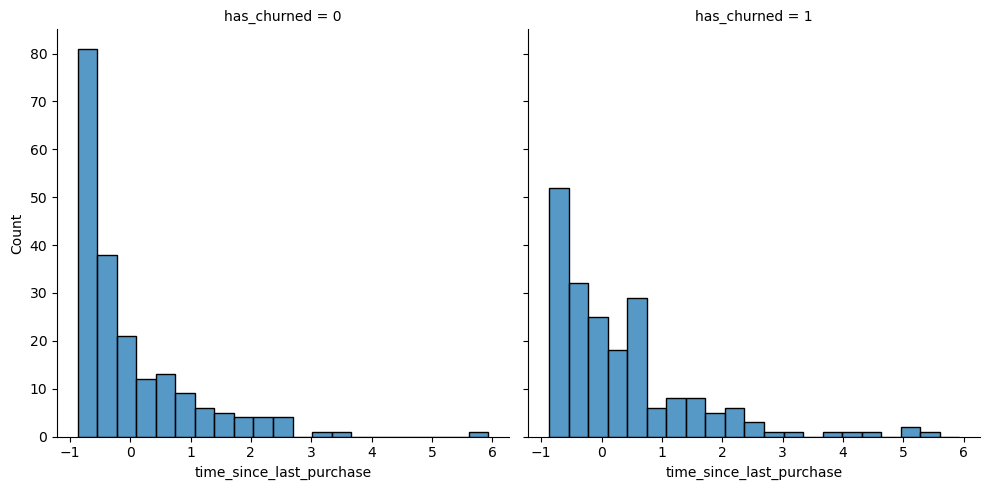

In [9]:
sns.displot(data=churn, 
            x = 'time_since_last_purchase', 
            col='has_churned')
plt.show()

Churned customers had less recent activity

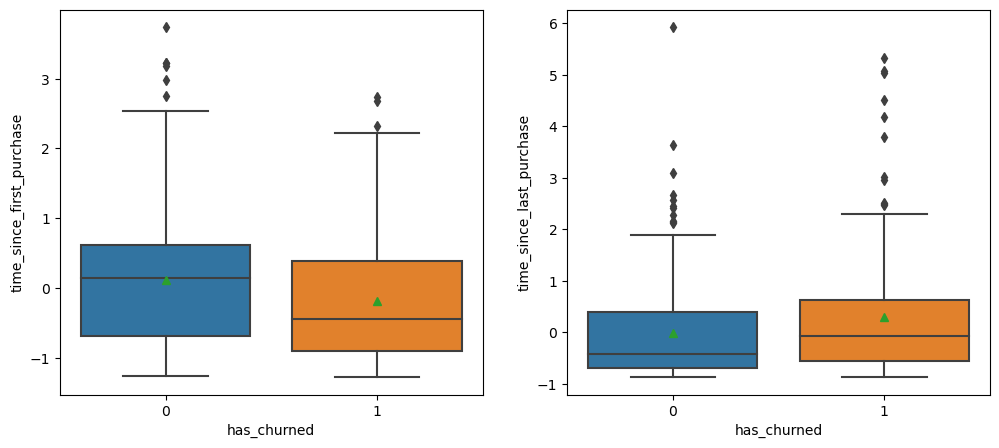

In [11]:
# visualize distribution of churn
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.boxplot(data=churn, 
            y = 'time_since_first_purchase', 
            x = 'has_churned', 
            showmeans = True, ax=ax[0])
sns.boxplot(data=churn, 
            y = 'time_since_last_purchase', 
            x = 'has_churned', showmeans = True, ax=ax[1])
plt.show()

The boxplot indicate that customers with shorter length of relationship and less recent activity tend to churn more frequently.

# k-Nearest Neighbors

In [12]:
# import module
from sklearn.neighbors import KNeighborsClassifier

# create features and target variables
X = churn.drop('has_churned', axis=1)
y = churn['has_churned']

# instantiate classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)

# fit classifier to the data
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=6)

In [13]:
# create a set of unseen data
from itertools import product

time_since_first_purchase = np.arange(
    churn['time_since_first_purchase'].min(), 
    churn['time_since_first_purchase'].max(), .5)

time_since_last_purchase = np.arange(
    churn['time_since_last_purchase'].min(), 
    churn['time_since_last_purchase'].max(), .5)

# create 'p' as all combinations of values of
# 'time_since_first_purchase' and 'time_since_last_purchase'
p = product(time_since_first_purchase, 
            time_since_last_purchase)

# transform 'p' into DF and name the columns
features = pd.DataFrame(p, 
                        columns = ['time_since_first_purchase', 
                                   'time_since_last_purchase'])
# make prediction for training data X
y_pred = knn.predict(X)

# make prediction on unseen data features
y_pred_features = knn.predict(features)

# add column of predictions
prediction_data = features.assign(has_churn=y_pred_features)
prediction_data.head()

,time_since_first_purchase,time_since_last_purchase,has_churn
0,-1.27377,-0.870666,1
1,-1.27377,-0.370666,1
2,-1.27377,0.129334,1
3,-1.27377,0.629334,1
4,-1.27377,1.129334,1


# train_test_split

In [14]:
# import train_test_split
from sklearn.model_selection import train_test_split

# create features and target data
X = churn.drop('has_churned', axis=1)
y = churn['has_churned']

# randomly split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=534
)

# instantiate k-NN classifier with 8 neighbors
knn_8 = KNeighborsClassifier(n_neighbors=8)

# fit classifier to the training data
knn_8.fit(X_train, y_train)

# make prediction on the test data
y_pred = knn_8.predict(X_test)

# compute accuracy of the model
knn_8.score(X_test, y_test)

0.5916666666666667

# Overfitting and Underfitting

Compute and plot training and testing accuracy scores for a variety of different neighbor values. By observing how the accuracy scores differ for the training and testing sets with different values of 'k', we develop an intuition for overfitting and underfitting.

In [16]:
# set array to store train and accuracies
neighbors = np.arange(1, 15)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# loop over different values of k
for i, k in enumerate(neighbors):
    # setup knn classifier with 'k' neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    # fit classifier to the training data
    knn.fit(X_train, y_train)
    # compute accuracy of the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)
print(train_accuracy)
print(test_accuracy)

[0.98928571 0.77142857 0.8        0.69285714 0.68214286 0.7
 0.68571429 0.65714286 0.675      0.65714286 0.67142857 0.65714286
 0.65       0.63928571]
[0.56666667 0.55833333 0.56666667 0.63333333 0.55       0.59166667
 0.58333333 0.59166667 0.59166667 0.51666667 0.55       0.53333333
 0.54166667 0.525     ]


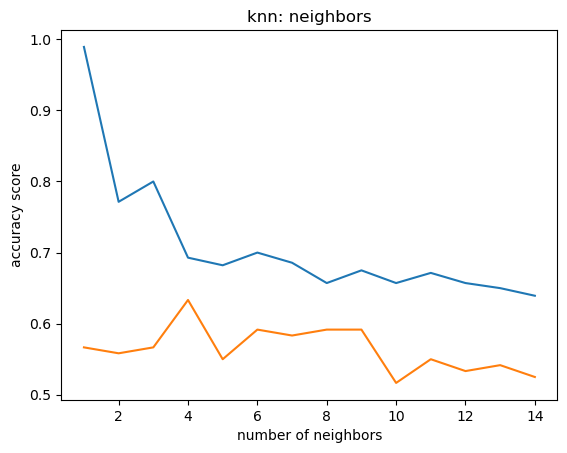

In [17]:
# generate the plot
plt.figure()
plt.plot(neighbors, train_accuracy, label='Train accuracy')
plt.plot(neighbors, test_accuracy, label='Test accuracy')
plt.title('knn: neighbors')
plt.xlabel('number of neighbors')
plt.ylabel('accuracy score')
plt.show()

The test accuracy is highest with 4 neighbors. Using 5 or more neighbors result in a simple model that underfits the data.

In [49]:
diabetes = pd.read_csv('data/diabetes.csv')
diabetes.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Fine-tuning the model

Metrics for classification

Accuracy is not always the informative metric for classification model. Now we compute the confusion matrix and generate classification report. The classification report consists of three rows, and an additional support column. The support gives the number of samples of the true response that lie in that class. Presision, recall, and f1 score columns give the respective metrics for that particular class.

The goal is to predict whether or not a given femail patient will contract diabetes based on features such as BMI, age, and number of pregnancies. Therefore, it is a binary classification problem. A target value of 0 indicates that the patient does not have diabetes, while a value of 1 indicates that the patient does have diabetes. We train a knn Classifier to the data and evaluate its performance by generating a confusion matrix and classification report.

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from statsmodels.graphics.mosaicplot import mosaic

# create features and target variables
X = diabetes.drop(columns=['diabetes'])
y = diabetes['diabetes']

# split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=.3, random_state=635)

# instantiate knn classifier with 8 neighbors
knn = KNeighborsClassifier(n_neighbors=8)

# fit the model to the training data
knn.fit(X_train, y_train)

# make prediction on testing data
y_pred = knn.predict(X_test)

# generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[133  17]
 [ 44  37]]


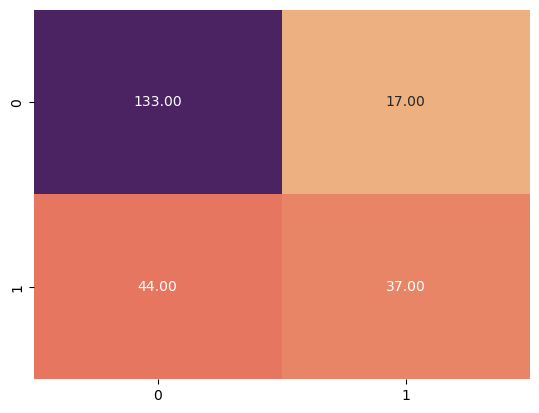

In [29]:
# plot confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='.2f', 
            cbar=False, cmap='flare')
plt.show()

In [31]:
# extract TN, TP, FN, FP from confusion matrix
TP = conf_matrix[1, 1]
TP

37

In [32]:
TN = conf_matrix[0, 0]
TN

133

In [34]:
FN = conf_matrix[1, 0]
FN

44

In [35]:
FP = conf_matrix[0, 1]
FP

17

In [36]:
# create classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.89      0.81       150
           1       0.69      0.46      0.55        81

    accuracy                           0.74       231
   macro avg       0.72      0.67      0.68       231
weighted avg       0.73      0.74      0.72       231



# Precision

Precision = TP/(TP + FP)

Precision indicates what proportion of positive identifications was actually correct. A model that produces No False Positives has Precision = 1.0

The less Precision is, the more FP the model predict. If we want to reduce FP, we need to increase Precision score. If Precision = 1.0 (max), we don`t have any FP at all. 

Working with Precision, we manage FP. Precision increases - FP decreases, Precision decreases - FP increases. When it comes to fraud, FP means the model labels good customers as fraus. 

In [50]:
# calculate Precision in the example above
# the result indicates that 69% of the positives, 
# indicated by the model are actual positives.
# The 31% of cases, indicated as positives are 
# negatives in fact or FP
Precision = TP/(TP + FP)
print(Precision)

0.6851851851851852


# Recall

Recall = TP/(TP + FN)

Recall indicates what proportion of actual positives was identified correctly. A model that produce No False Negatives has Recall = 1.0

The less Recall is the more FN the model predict. If we want to reduce FN, we need to improve Recall. If Recall = 1.0 (max), the model doesn`t predict any FN. 

Working with Recall, we manage FN (False Negative) metric. Recal increases - FN decreases, Recall decreases - FN increases. When it comes to fraud, False Negative means the model doesn`t recognise fraudulant events.

In [52]:
# calculate Recall in the example above
# Recall = 0.46 means the model recognise 46% positives only.
# 54% of actual positives wes labeled as negatives by the model.
# which means the model doesn`t recognise 54% 
# of actual fraudulent events 
Recall = TP/(TP + FN)
print(Recall)

0.4567901234567901


# Precision vs Recall

To fully evaluate effectiveness of a model, we must examine both Precision and Recall. Unfortunatelly, Precision and Recall are often in tension. That is, improving Precision typically reduces Recall and vica versa.

# Logistic regression and ROC curve 

Scikit-learn makes it very easy to try different models, since train_test_split/instantiate/fit/predict paradigm applies to all classifiers and regressions, which are known in scikit-learn as 'estimators'. Check if logistic regression outperforms knn.

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# instantiate logistic regression object
logreg = LogisticRegression(max_iter=1000, tol=0.1)

# fit classifier to the train data
logreg.fit(X_train, y_train)

# predict labels on the test data
y_pred = logreg.predict(X_test)

# compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[128  22]
 [ 37  44]]


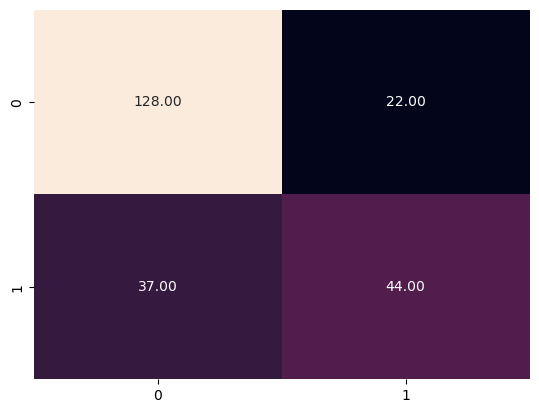

In [38]:
# plot confusion matrix
sns.heatmap(conf_matrix, fmt='.2f', annot=True, cbar=False)
plt.show()

In [39]:
# compute classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.85      0.81       150
           1       0.67      0.54      0.60        81

    accuracy                           0.74       231
   macro avg       0.72      0.70      0.71       231
weighted avg       0.74      0.74      0.74       231



# Plotting ROC curve

Classification report and confusion matrix are great methods to quantitatively evaluate model performance, while ROC curve provides a way to visually evaluate the model. Most classifiers in scikit-learn have .predict_proba() method which returns the probability of a given sample being in particular class.

In [44]:
from sklearn.metrics import roc_curve

# compute predicted probabilities of the labels of X_test
y_pred_prob = logreg.predict_proba(X_test)[:, 1]
print(y_pred_prob[:5])

[0.42251738 0.98233701 0.07350687 0.21749266 0.33808583]


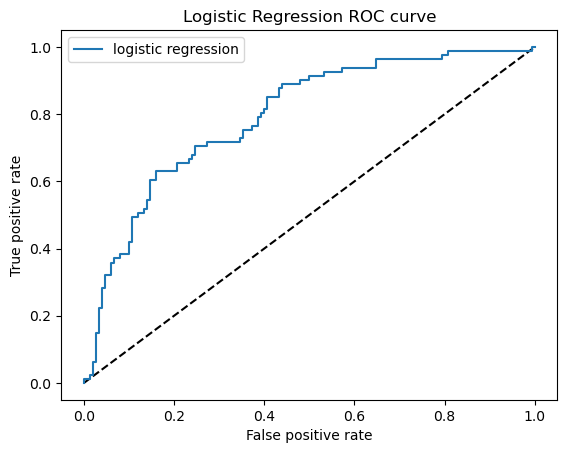

In [45]:
# create ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# plot ROC curve with fpr on x-axis and tpr on y-axis
fig = plt.figure()
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='logistic regression')
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("Logistic Regression ROC curve")
plt.legend()
plt.show()

# Precision-Recall curve

Presision-recall curve is another way to visually evaluate a model performance. Precision-recall curve generated by plotting the precision and recall for different thresholds. This implementation is restricted to the binary classification task.

Precision = TP/(TP + FP)

Recall = TP/(TP + FN)

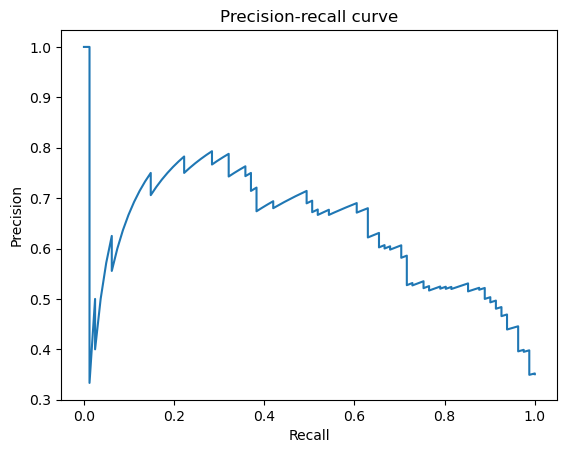

In [46]:
from sklearn.metrics import precision_recall_curve

# generate Precision-recall curve values
precision, recall, thresholds = precision_recall_curve(
    y_test, y_pred_prob)

# plot Precision-recall curve with Recall on x-axis and
# Precision on y-axis
fig = plt.figure()
plt.plot(recall, precision)
plt.title('Precision-recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

The precision-recall curve shows the tradeoff between precision and recall for different thresholds. A high area under the curve represents both high recal and high precision, where high precision relates to a low False positive rate, and high recall relates to a low False negative rate. High scores for both show that the classifier is returning accurate results (high precision) as well as returning a majority of all positive results(high recall). 

A system with high recall but low precision returns many results, but most of its predicted labels are incorrect when compared to the training labels. A system with high precision but low recall is just the opposite, returning very few results, but most of its predicted labels are correct when compared to the training labels. An ideal system with high precision and high recall will return many results, with all results labeled correctly. 

In [20]:
diabetes = pd.read_csv('data/diabetes.csv')
diabetes.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
